# Clustering notre Data

# Sommaire
- [Fruit dataset](#fruit-dataset)
  - [CNN](#CNN)
    - [Traitement de data](#traitement-de-data)
    - [Dimensional reduction](#dimensional-reduction)
    - [Clustering](#clustering)
  - [Vit](#Vit)
    - [Traitement de data](#traitement-de-data)
    - [Dimensional reduction](#dimensional-reduction)
    - [Clustering](#clustering)
- [Pokemon dataset](#pokemon-dataset)
  - [CNN](#CNN)
    - [Traitement de data](#traitement-de-data)
    - [Dimensional reduction](#dimensional-reduction)
    - [Clustering](#clustering)
  - [Vit](#Vit)
    - [Traitement de data](#traitement-de-data)
    - [Dimensional reduction](#dimensional-reduction)
    - [Clustering](#clustering)
- [Conclusion](#conclusion)


# Overhead

Pour notre demarche pour le traitement de données et la façon avec la quelle on a fait l'extraction des features.On a fait beaucoup d'experimentation et beaucoup de teste sur les données qu'on a choisit mais aussi des données qui sont plus simple(les fruits) pour evaluer notre demarche 

# Fruit dataset

C'est la data qu'on a utilisé pour voir si notre demarche est bien valide.Parceque c'est simple a voir la difference entre une pomme et une banane
On a utiliser deux type de extraction de features CNN et Vit

## CNN methode

### Traitement de data

Extraction des features à partir des images

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np
import os

# 1. Charger le modèle sans les couches finales afin d’extraire les features (il existe d’autres options comme VGG16 ou ResNet50, mais EfficientNet est plus efficace)
base_model = EfficientNetB2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# 2. Créer un nouveau modèle qui produit les features
visualization_model = Model(
    inputs=base_model.input,
    outputs=GlobalAveragePooling2D()(base_model.output)
)

# 3. Charger les images, les prétraiter et extraire les features
folder_path = "dataset_fruit/train"
feature_maps = []
labels = dict()
i =0 
for name in ["Apple" , "Beans","Banana","Carrot"]:
    files = [f for f in os.listdir(f"{folder_path}/{name}")]
    first_ten= files[:40]
    for img_name in first_ten:
        img_path= os.path.join(folder_path,name,img_name)
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        emb = visualization_model.predict(x)
        feature_maps.append(emb[0])
        labels[img_name]=i
    i=i+1
X= np.array(feature_maps)
print(X.shape)
print(emb.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Normalisation et diminution de dimension des features

(160,)


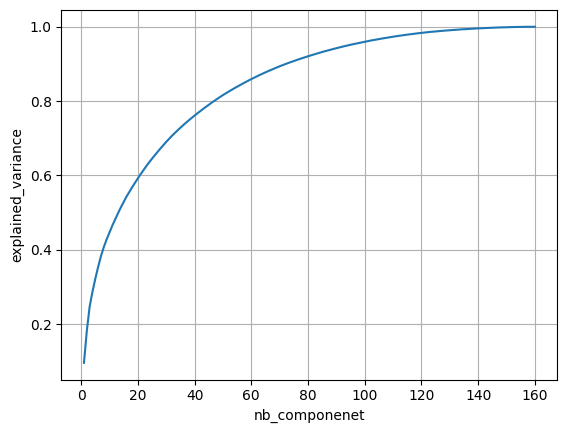

nombre de composantes pour 95% de variance: 95


In [5]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
explained_variance=[]

scaler = StandardScaler()
pca = PCA()
X_scaled = scaler.fit_transform(X)
images1 = pca.fit_transform(X_scaled)
explained_variance.append(pca.explained_variance_ratio_)
print(explained_variance[0].shape)
variance=0
variance_list=list()
for i in range(explained_variance[0].shape[0]):
    variance+=explained_variance[0][i]
    variance_list.append(variance)

#faire la somme 
nb=np.arange(1,explained_variance[0].shape[0]+1)
plt.plot(nb,variance_list)
plt.xlabel("nb_componenet")
plt.ylabel("explained_variance")
plt.grid()
plt.show()

i = 0
while i < len(variance_list):
    if variance_list[i] >= 0.95:
        pca_components = i + 1
        break
    i += 1
print(f"nombre de composantes pour 95% de variance: {pca_components}")

### Dimensional reduction

In [6]:
pca_ = PCA(n_components=pca_components)
X_reduced = pca_.fit_transform(X)
print(X_reduced.shape)

(160, 95)


In [37]:
import umap
reducer = umap.UMAP(
    n_components=5,        # or 5 for HDBSCAN
    n_neighbors=25,
    min_dist=0.0,
    metric="cosine",
    random_state=42
)

X_umap = reducer.fit_transform(X_reduced)

/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Clustering

In [38]:
import hdbscan
print("Running HDBSCAN...")
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom')
labels_hdbscan = clusterer.fit_predict(X_umap)

Running HDBSCAN...


In [39]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools
min_samples = np.arange(1, 100, step=1)
epsilons = np.arange(1, 100, step=1)
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 3) or (num_clusters > 10):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X_umap)

Index: 0, Score: 0.8152211904525757, Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 3 2 3 2 3 3 2 3 2 3 2 2 2 3 2 3 2 3 2 2 3 3 3 3 3 2 2 2 2 2
 2 3 3 2 3 2 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 1 4 4 4 4 4 4], NumClusters: 5
Index: 1, Score: 0.8152211904525757, Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 3 2 3 2 3 3 2 3 2 3 2 2 2 3 2 3 2 3 2 2 3 3 3 3 3 2 2 2 2 2
 2 3 3 2 3 2 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 1 4 4 4 4 4 4], NumClusters: 5
Index: 2, Score: 0.8152211904525757, Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 3 2 3 2 3 3 2 3 

In [41]:
print(best_dict["best_labels"])
print(best_dict["best_score"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
0.8838035464286804


In [42]:
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(X_reduced, method='ward')
labels_hierarchy = fcluster(Z, t=4, criterion='maxclust')
print(labels_hierarchy)

from sklearn.metrics import silhouette_score
score = silhouette_score(X_umap, labels_hierarchy)
print(score)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 4 4 3 3 4 3 3 4 3 3 3 4 3 4 4 3 4 3 3 3 3 3 4 4 3 4 3 4 4 3 3 4 4 4
 3 4 3 3 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4]
0.6021698713302612


In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
    
n_clusters = 4  # choose based on your data or use methods like the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=300)
labels2 = kmeans.fit_predict(X_umap)
print(labels2)
print(labels.values())
from sklearn.metrics import silhouette_score
score = silhouette_score(X_umap, labels2)
print(score)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 0 3 3 3 3 3 3]
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
0.8364307284355164


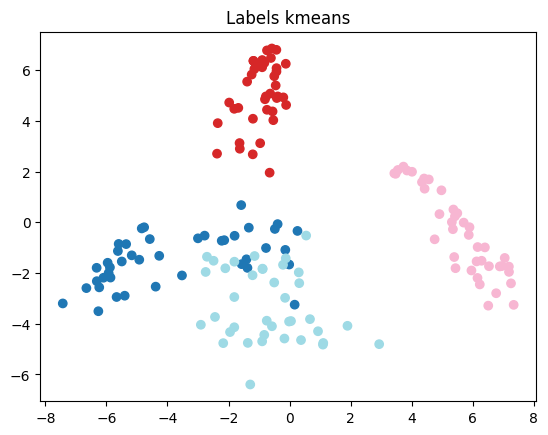

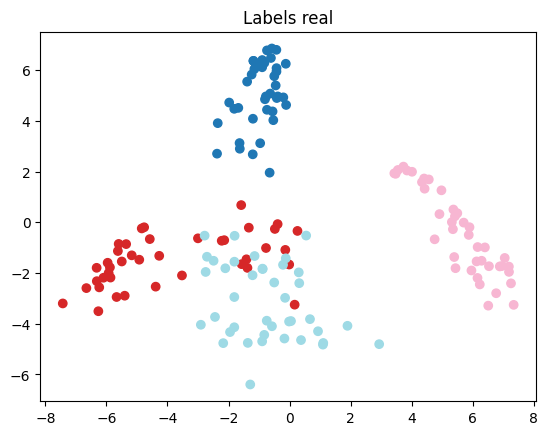

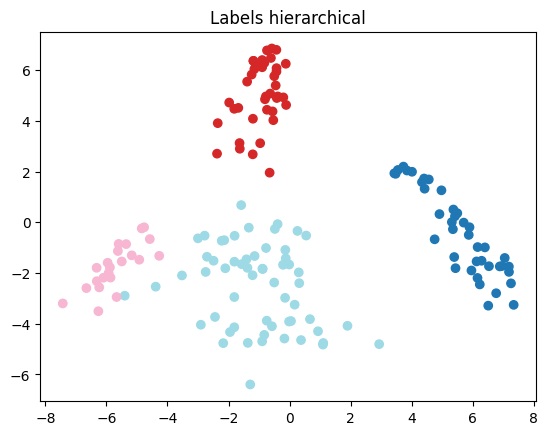

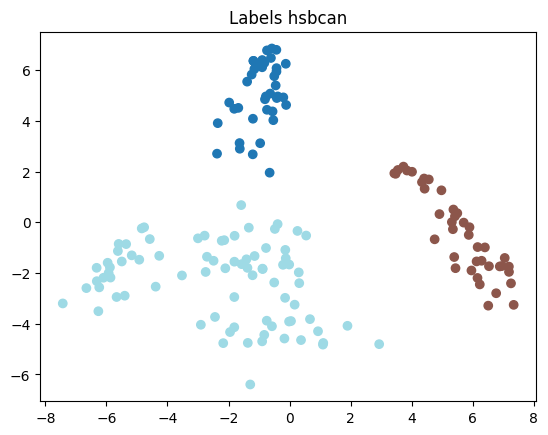

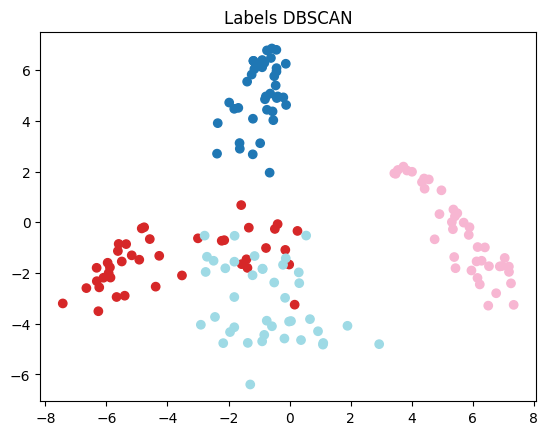

In [22]:
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels2, cmap='tab20')
plt.title("Labels kmeans")
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels.values(), cmap='tab20')
plt.title("Labels real")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_hierarchy, cmap='tab20')
plt.title("Labels hierarchical")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_hdbscan, cmap='tab20')
plt.title("Labels hsbcan")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels.values(), cmap='tab20')
plt.title("Labels DBSCAN")
plt.show()

## Vit

### Traitement de data

Extraction des features à partir des images

In [2]:
import torch

# Charger le modèle DINOv2 pré-entraîné
device = "cuda" if torch.cuda.is_available() else "cpu"

model = torch.hub.load(
    "facebookresearch/dinov2",
    "dinov2_vitb14"
)
model.eval().to(device)

Using cache found in /home/asta/.cache/torch/hub/facebookresearch_dinov2_main
/home/asta/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/asta/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/asta/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (norm): LayerNorm((768,), eps=1e-06, elementwise_affi

Normalisation et diminution de dimension des features

In [ ]:
from torchvision import transforms
from PIL import Image
import numpy as np
import os

# Définir les transformations d'image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    ),
])

# Extraire les features des images
folder_path = "dataset_fruit/train"
feature_maps = []
labels = dict()
i =0 
for name in ["Apple" , "Beans","Banana","Carrot"]:
    files = [f for f in os.listdir(f"dataset_fruit/train/{name}")]
    first_ten= files[:40]
    for img_name in first_ten:
        img_path= os.path.join(folder_path,name,img_name)
        img = Image.open(img_path).convert("RGB")
        x = transform(img).unsqueeze(0).to(device)
        with torch.no_grad():
            out = model.forward_features(x)
        cls_token = out["x_norm_clstoken"]     
        patch_tokens = out["x_norm_patchtokens"] 
        patch_mean = patch_tokens.mean(dim=1)
        features = torch.cat([cls_token, patch_mean], dim=1)
        hybrid_embeddings = torch.nn.functional.normalize(features, p=2, dim=1)
        hybrid_embeddings=hybrid_embeddings.cpu().numpy()
        feature_maps.append(hybrid_embeddings)
        labels[img_name]=i
    i=i+1
# Concaténer les features extraites
X= np.concatenate( feature_maps,axis=0)

### Dimensional reduction

[[ 0.06867643  0.04673368  0.00432894 ... -0.00902565 -0.00231801
  -0.00456833]
 [ 0.03315528 -0.00042856  0.04149085 ... -0.01323935 -0.01588071
  -0.00187443]
 [ 0.05821289 -0.00808082  0.02889705 ... -0.00838388 -0.00398755
  -0.01225026]
 ...
 [ 0.03204795 -0.01875993  0.00856403 ...  0.00998107 -0.00153326
   0.00914926]
 [-0.02488659 -0.03748458 -0.00594498 ...  0.01101816 -0.01602968
   0.01018875]
 [-0.02932641 -0.04901797 -0.02353865 ...  0.00753757  0.00186424
   0.00069938]]
[[ 4.1675371e-01  2.8761503e-01  1.9225045e-01 ... -9.4115821e-04
  -9.5762886e-08  4.6725408e-08]
 [ 3.9211270e-01  3.1542176e-01  3.0410880e-01 ... -8.6741470e-04
  -9.5762758e-08  4.6725422e-08]
 [ 3.4837076e-01  2.1838732e-01  1.8395059e-01 ...  4.7603354e-04
  -9.5762957e-08  4.6725461e-08]
 ...
 [ 2.7718246e-01 -5.4632252e-01 -1.7040688e-01 ...  1.1420359e-04
  -9.5763163e-08  4.6725564e-08]
 [ 3.2127231e-01 -5.6233382e-01 -1.6755547e-01 ... -5.4565951e-04
  -9.5762971e-08  4.6725521e-08]
 [ 3.295

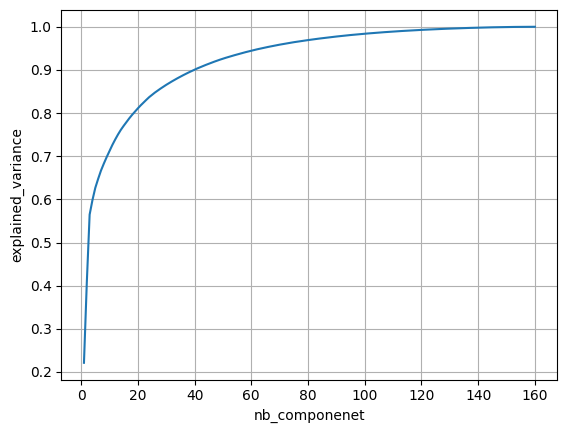

nombre de composantes pour 95% de variance: 64


In [15]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
explained_variance=[]
pca = PCA()
print(X)
images1 = pca.fit_transform(X)
print(images1)
explained_variance.append(pca.explained_variance_ratio_)
print(explained_variance[0].shape)
variance=0
variance_list=list()
for i in range(explained_variance[0].shape[0]):
    variance+=explained_variance[0][i]
    variance_list.append(variance)
print(variance_list)

#faire la somme 
nb=np.arange(1,explained_variance[0].shape[0]+1)
plt.plot(nb,variance_list)
plt.xlabel("nb_componenet")
plt.ylabel("explained_variance")
plt.grid()
plt.show()

i = 0
while i < len(variance_list):
    if variance_list[i] >= 0.95:
        pca_components = i + 1
        break
    i += 1
print(f"nombre de composantes pour 95% de variance: {pca_components}")

In [16]:
pca_ = PCA(n_components=pca_components)
X_reduced = pca_.fit_transform(X)
print(X_reduced.shape)

(160, 64)


In [17]:
import umap
reducer = umap.UMAP(
    n_components=5,        # or 5 for HDBSCAN
    n_neighbors=25,
    min_dist=0.0,
    metric="cosine",
    random_state=42
)

X_umap = reducer.fit_transform(X_reduced)

/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Clustering

In [18]:
import hdbscan
print("Running HDBSCAN...")
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom')
labels_hdbscan = clusterer.fit_predict(X_umap)

Running HDBSCAN...


In [24]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools
min_samples = np.arange(1, 100, step=1)
epsilons = np.arange(1, 100, step=1)
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 4) or (num_clusters > 10):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X_umap)

Index: 0, Score: 0.8978062868118286, Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 3 2 3 2 3 3 2 3 2 3 2 2 2 3 2 3 2 3 2 2 3 3 3 3 3 2 2 2 2 2
 2 3 3 2 3 2 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4], NumClusters: 5
Index: 1, Score: 0.8978062868118286, Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 3 2 3 2 3 3 2 3 2 3 2 2 2 3 2 3 2 3 2 2 3 3 3 3 3 2 2 2 2 2
 2 3 3 2 3 2 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4], NumClusters: 5
Index: 2, Score: 0.8978062868118286, Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 3 2 3 2 3 3 2 3 

In [25]:
print(best_dict["best_labels"])
print(best_dict["best_score"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3]
0.94220370054245


In [26]:
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(X_reduced, method='ward')
labels_hierarchy = fcluster(Z, t=4, criterion='maxclust')
print(labels_hierarchy)

from sklearn.metrics import silhouette_score
score = silhouette_score(X_umap, labels_hierarchy)
print(score)


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4]
0.9241523742675781


In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
    
n_clusters = 4  # choose based on your data or use methods like the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=300)
labels2 = kmeans.fit_predict(X_umap)
print(labels2)
print(labels.values())
from sklearn.metrics import silhouette_score
score = silhouette_score(X_umap, labels2)
print(score)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3]
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
0.94220370054245


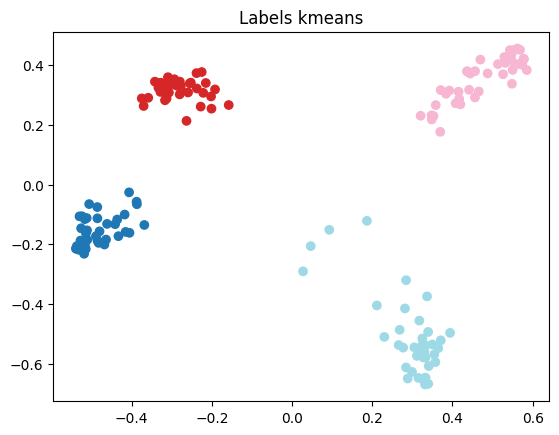

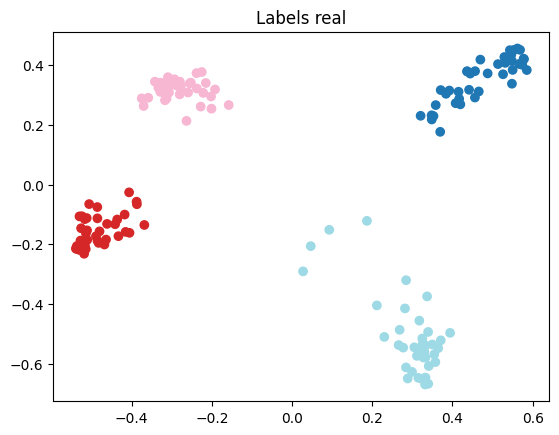

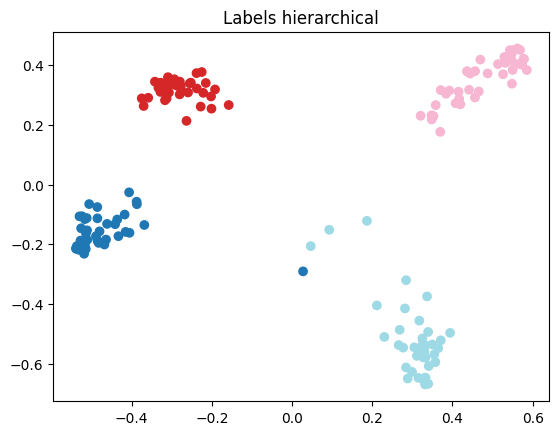

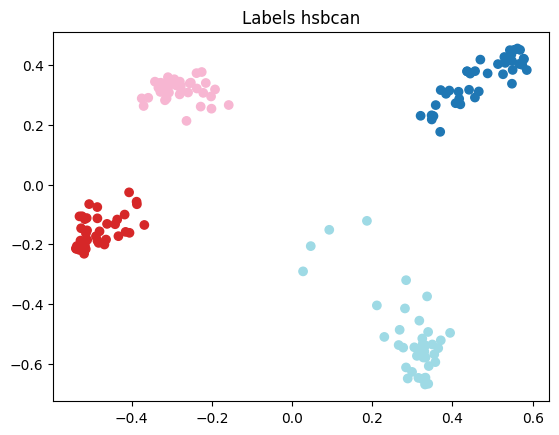

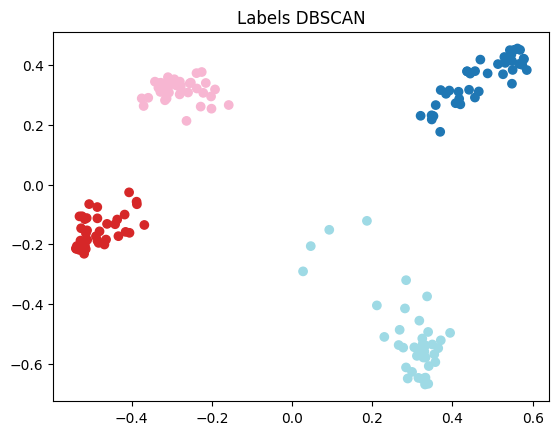

In [28]:
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels2, cmap='tab20')
plt.title("Labels kmeans")
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels.values(), cmap='tab20')
plt.title("Labels real")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_hierarchy, cmap='tab20')
plt.title("Labels hierarchical")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_hdbscan, cmap='tab20')
plt.title("Labels hsbcan")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels.values(), cmap='tab20')
plt.title("Labels DBSCAN")
plt.show()

# Pokemon dataset

C'est la vrai dataset qu'on voulait cluster qui va prendre plusieurs pokemon et les cluster

## CNN methode

### Traitement de data

Extraction des features à partir des images

In [76]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np
import os

# 1. Charger le modèle sans les couches finales afin d’extraire les features (il existe d’autres options comme VGG16 ou ResNet50, mais EfficientNet est plus efficace)
base_model = EfficientNetB2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# 2. Créer un nouveau modèle qui produit les features
visualization_model = Model(
    inputs=base_model.input,
    outputs=GlobalAveragePooling2D()(base_model.output)
)

# 3. Charger les images, les prétraiter et extraire les features
folder_path = "dataset_fruit/train"
feature_maps = []
labels = dict()
i =0 
for name in ["Apple" , "Beans","Banana","Carrot"]:
    files = [f for f in os.listdir(f"{folder_path}/{name}")]
    first_ten= files[:40]
    for img_name in first_ten:
        img_path= os.path.join(folder_path,name,img_name)
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        emb = visualization_model.predict(x)
        feature_maps.append(emb[0])
        labels[img_name]=i
    i=i+1
X= np.array(feature_maps)
print(X.shape)
print(emb.shape)

I0000 00:00:1766840669.578958    5124 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1461 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5
2025-12-27 14:04:30.483294: W external/local_xla/xla/service/gpu/llvm_gpu_backend/default/nvptx_libdevice_path.cc:41] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykernel_launcher.runfiles/cuda_nvdisasm
  ipykernel_launcher.runfiles/nvidia_nvshmem
  ipykern/cuda_nvcc
  ipykern/cuda_nvdisasm
  ipykern/nvidia_nvshmem
  
  /usr/local/cuda
  /opt/cuda
  /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /mnt/c/Users/MSI

UnavailableError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 758, in start

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/ipykernel/utils.py", line 71, in preserve_context

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 614, in shell_main

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 366, in execute_request

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 827, in execute_request

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 458, in do_execute

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 663, in run_cell

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_5124/1842606350.py", line 37, in <module>

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 588, in predict

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 282, in one_step_on_data_distributed

  File "/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 125, in wrapper

No PTX compilation provider is available. Neither ptxas/nvlink nor nvjtlink is available. As a fallback you can enable JIT compilation in the CUDA driver via the flag `--xla_gpu_unsafe_fallback_to_driver_on_ptxas_not_found`. Details: 
 - Has NvJitLink support: LibNvJitLink is not supported (disabled during compilation).
 - Has NvPtxCompiler support: LibNvPtxCompiler is not supported (disabled during compilation).
 - Parallel compilation support is desired: 0
 - ptxas_path: Couldn't find a suitable version of ptxas. The following locations were considered: ./cuda_sdk_lib/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/bin/ptxas, /home/asta/.vscode-server/bin/618725e67565b290ba4da6fe2d29f8fa1d4e3622/bin/remote-cli/ptxas, /opt/ros/humble/bin/ptxas, /usr/local/sbin/ptxas, /usr/local/bin/ptxas, /usr/sbin/ptxas, /usr/bin/ptxas, /sbin/ptxas, /bin/ptxas, /usr/games/ptxas, /usr/local/games/ptxas, /usr/lib/wsl/lib/ptxas, /mnt/c/Program Files/Common Files/Oracle/Java/javapath/ptxas, /mnt/c/Program Files (x86)/Common Files/Oracle/Java/java8path/ptxas, /mnt/c/Program Files (x86)/Common Files/Oracle/Java/javapath/ptxas, /mnt/c/Program Files (x86)/Common Files/Intel/Shared Libraries/redist/intel64/compiler/ptxas, /mnt/c/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.3/bin/ptxas, /mnt/c/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.3/libnvvp/ptxas, /mnt/c/WINDOWS/system32/ptxas, /mnt/c/WINDOWS/ptxas, /mnt/c/WINDOWS/System32/Wbem/ptxas, /mnt/c/WINDOWS/System32/WindowsPowerShell/v1.0/ptxas, /mnt/c/WINDOWS/System32/OpenSSH/ptxas, /mnt/c/Program Files/NVIDIA Corporation/Nsight Compute 2023.3.1/ptxas, /mnt/c/Program Files (x86)/NVIDIA Corporation/PhysX/Common/ptxas, /mnt/c/Program Files/NVIDIA Corporation/NVIDIA NvDLISR/ptxas, /mnt/c/Program Files/Git/cmd/ptxas, /mnt/c/Program Files/Microchip/xc8/v2.46/bin/ptxas, /mnt/c/Program Files/usbipd-win/ptxas, /mnt/c/Program Files/Docker/Docker/resources/bin/ptxas, /mnt/c/Program Files/dotnet/ptxas, /mnt/c/Program Files (x86)/IVI Foundation/IVI/Bin/ptxas, /mnt/c/Program Files/IVI Foundation/IVI/Bin/ptxas, /mnt/c/Program Files (x86)/ivi foundation/visa/WinNT/Bin/ptxas, /mnt/c/Program Files/IVI Foundation/VISA/Win64/Bin/ptxas, /mnt/c/Program Files/Keysight/IO Libraries Suite/bin/ptxas, /mnt/c/Program Files (x86)/Keysight/IO Libraries Suite/bin/ptxas, /mnt/c/Program Files (x86)/IVI Foundation/VISA/winnt/ktvisa/ptxas, /mnt/c/Program Files (x86)/IVI Foundation/VISA/winnt/bin/ptxas, /mnt/c/Program Files/IVI Foundation/VISA/win64/ktvisa/ptxas, /mnt/c/Program Files/IVI Foundation/VISA/win64/bin/ptxas, /mnt/c/Windows/system32/ptxas, /mnt/c/Windows/ptxas, /mnt/c/Windows/System32/Wbem/ptxas, /mnt/c/Windows/System32/WindowsPowerShell/v1.0/ptxas, /mnt/c/Windows/System32/OpenSSH/ptxas, /mnt/c/Users/MSI/AppData/Local/Microsoft/WindowsApps/ptxas, /mnt/c/Users/MSI/AppData/Local/Programs/Microsoft VS Code/bin/ptxas, /mnt/c/MinGW/bin/ptxas, /mnt/c/Users/MSI/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0/LocalCache/local-packages/Python311/Scripts/ptxas, /mnt/c/intelFPGA/23.1std/questa_fse/win64/ptxas, /mnt/c/Program Files (x86)/Nmap/ptxas, /mnt/c/Users/MSI/AppData/Local/Microsoft/WindowsApps/ptxas, /mnt/c/Users/MSI/.dotnet/tools/ptxas, /snap/bin/ptxas, ipykernel_launcher.runfiles/cuda_nvcc/bin/ptxas, ipykernel_launcher.runfiles/cuda_nvdisasm/bin/ptxas, ipykernel_launcher.runfiles/nvidia_nvshmem/bin/ptxas, ipykern/cuda_nvcc/bin/ptxas, ipykern/cuda_nvdisasm/bin/ptxas, ipykern/nvidia_nvshmem/bin/ptxas, bin/ptxas, /usr/local/cuda/bin/ptxas, /opt/cuda/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../cuda/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../../../bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../../../../bin/ptxas
 - ptxas_version: Couldn't find a suitable version of ptxas. The following locations were considered: ./cuda_sdk_lib/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/bin/ptxas, /home/asta/.vscode-server/bin/618725e67565b290ba4da6fe2d29f8fa1d4e3622/bin/remote-cli/ptxas, /opt/ros/humble/bin/ptxas, /usr/local/sbin/ptxas, /usr/local/bin/ptxas, /usr/sbin/ptxas, /usr/bin/ptxas, /sbin/ptxas, /bin/ptxas, /usr/games/ptxas, /usr/local/games/ptxas, /usr/lib/wsl/lib/ptxas, /mnt/c/Program Files/Common Files/Oracle/Java/javapath/ptxas, /mnt/c/Program Files (x86)/Common Files/Oracle/Java/java8path/ptxas, /mnt/c/Program Files (x86)/Common Files/Oracle/Java/javapath/ptxas, /mnt/c/Program Files (x86)/Common Files/Intel/Shared Libraries/redist/intel64/compiler/ptxas, /mnt/c/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.3/bin/ptxas, /mnt/c/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.3/libnvvp/ptxas, /mnt/c/WINDOWS/system32/ptxas, /mnt/c/WINDOWS/ptxas, /mnt/c/WINDOWS/System32/Wbem/ptxas, /mnt/c/WINDOWS/System32/WindowsPowerShell/v1.0/ptxas, /mnt/c/WINDOWS/System32/OpenSSH/ptxas, /mnt/c/Program Files/NVIDIA Corporation/Nsight Compute 2023.3.1/ptxas, /mnt/c/Program Files (x86)/NVIDIA Corporation/PhysX/Common/ptxas, /mnt/c/Program Files/NVIDIA Corporation/NVIDIA NvDLISR/ptxas, /mnt/c/Program Files/Git/cmd/ptxas, /mnt/c/Program Files/Microchip/xc8/v2.46/bin/ptxas, /mnt/c/Program Files/usbipd-win/ptxas, /mnt/c/Program Files/Docker/Docker/resources/bin/ptxas, /mnt/c/Program Files/dotnet/ptxas, /mnt/c/Program Files (x86)/IVI Foundation/IVI/Bin/ptxas, /mnt/c/Program Files/IVI Foundation/IVI/Bin/ptxas, /mnt/c/Program Files (x86)/ivi foundation/visa/WinNT/Bin/ptxas, /mnt/c/Program Files/IVI Foundation/VISA/Win64/Bin/ptxas, /mnt/c/Program Files/Keysight/IO Libraries Suite/bin/ptxas, /mnt/c/Program Files (x86)/Keysight/IO Libraries Suite/bin/ptxas, /mnt/c/Program Files (x86)/IVI Foundation/VISA/winnt/ktvisa/ptxas, /mnt/c/Program Files (x86)/IVI Foundation/VISA/winnt/bin/ptxas, /mnt/c/Program Files/IVI Foundation/VISA/win64/ktvisa/ptxas, /mnt/c/Program Files/IVI Foundation/VISA/win64/bin/ptxas, /mnt/c/Windows/system32/ptxas, /mnt/c/Windows/ptxas, /mnt/c/Windows/System32/Wbem/ptxas, /mnt/c/Windows/System32/WindowsPowerShell/v1.0/ptxas, /mnt/c/Windows/System32/OpenSSH/ptxas, /mnt/c/Users/MSI/AppData/Local/Microsoft/WindowsApps/ptxas, /mnt/c/Users/MSI/AppData/Local/Programs/Microsoft VS Code/bin/ptxas, /mnt/c/MinGW/bin/ptxas, /mnt/c/Users/MSI/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0/LocalCache/local-packages/Python311/Scripts/ptxas, /mnt/c/intelFPGA/23.1std/questa_fse/win64/ptxas, /mnt/c/Program Files (x86)/Nmap/ptxas, /mnt/c/Users/MSI/AppData/Local/Microsoft/WindowsApps/ptxas, /mnt/c/Users/MSI/.dotnet/tools/ptxas, /snap/bin/ptxas, ipykernel_launcher.runfiles/cuda_nvcc/bin/ptxas, ipykernel_launcher.runfiles/cuda_nvdisasm/bin/ptxas, ipykernel_launcher.runfiles/nvidia_nvshmem/bin/ptxas, ipykern/cuda_nvcc/bin/ptxas, ipykern/cuda_nvdisasm/bin/ptxas, ipykern/nvidia_nvshmem/bin/ptxas, bin/ptxas, /usr/local/cuda/bin/ptxas, /opt/cuda/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../cuda/bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../../../bin/ptxas, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../../../../bin/ptxas
 - nvlink_path: Couldn't find a suitable version of nvlink. The following locations were considered: ./cuda_sdk_lib/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/bin/nvlink, /home/asta/.vscode-server/bin/618725e67565b290ba4da6fe2d29f8fa1d4e3622/bin/remote-cli/nvlink, /opt/ros/humble/bin/nvlink, /usr/local/sbin/nvlink, /usr/local/bin/nvlink, /usr/sbin/nvlink, /usr/bin/nvlink, /sbin/nvlink, /bin/nvlink, /usr/games/nvlink, /usr/local/games/nvlink, /usr/lib/wsl/lib/nvlink, /mnt/c/Program Files/Common Files/Oracle/Java/javapath/nvlink, /mnt/c/Program Files (x86)/Common Files/Oracle/Java/java8path/nvlink, /mnt/c/Program Files (x86)/Common Files/Oracle/Java/javapath/nvlink, /mnt/c/Program Files (x86)/Common Files/Intel/Shared Libraries/redist/intel64/compiler/nvlink, /mnt/c/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.3/bin/nvlink, /mnt/c/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.3/libnvvp/nvlink, /mnt/c/WINDOWS/system32/nvlink, /mnt/c/WINDOWS/nvlink, /mnt/c/WINDOWS/System32/Wbem/nvlink, /mnt/c/WINDOWS/System32/WindowsPowerShell/v1.0/nvlink, /mnt/c/WINDOWS/System32/OpenSSH/nvlink, /mnt/c/Program Files/NVIDIA Corporation/Nsight Compute 2023.3.1/nvlink, /mnt/c/Program Files (x86)/NVIDIA Corporation/PhysX/Common/nvlink, /mnt/c/Program Files/NVIDIA Corporation/NVIDIA NvDLISR/nvlink, /mnt/c/Program Files/Git/cmd/nvlink, /mnt/c/Program Files/Microchip/xc8/v2.46/bin/nvlink, /mnt/c/Program Files/usbipd-win/nvlink, /mnt/c/Program Files/Docker/Docker/resources/bin/nvlink, /mnt/c/Program Files/dotnet/nvlink, /mnt/c/Program Files (x86)/IVI Foundation/IVI/Bin/nvlink, /mnt/c/Program Files/IVI Foundation/IVI/Bin/nvlink, /mnt/c/Program Files (x86)/ivi foundation/visa/WinNT/Bin/nvlink, /mnt/c/Program Files/IVI Foundation/VISA/Win64/Bin/nvlink, /mnt/c/Program Files/Keysight/IO Libraries Suite/bin/nvlink, /mnt/c/Program Files (x86)/Keysight/IO Libraries Suite/bin/nvlink, /mnt/c/Program Files (x86)/IVI Foundation/VISA/winnt/ktvisa/nvlink, /mnt/c/Program Files (x86)/IVI Foundation/VISA/winnt/bin/nvlink, /mnt/c/Program Files/IVI Foundation/VISA/win64/ktvisa/nvlink, /mnt/c/Program Files/IVI Foundation/VISA/win64/bin/nvlink, /mnt/c/Windows/system32/nvlink, /mnt/c/Windows/nvlink, /mnt/c/Windows/System32/Wbem/nvlink, /mnt/c/Windows/System32/WindowsPowerShell/v1.0/nvlink, /mnt/c/Windows/System32/OpenSSH/nvlink, /mnt/c/Users/MSI/AppData/Local/Microsoft/WindowsApps/nvlink, /mnt/c/Users/MSI/AppData/Local/Programs/Microsoft VS Code/bin/nvlink, /mnt/c/MinGW/bin/nvlink, /mnt/c/Users/MSI/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0/LocalCache/local-packages/Python311/Scripts/nvlink, /mnt/c/intelFPGA/23.1std/questa_fse/win64/nvlink, /mnt/c/Program Files (x86)/Nmap/nvlink, /mnt/c/Users/MSI/AppData/Local/Microsoft/WindowsApps/nvlink, /mnt/c/Users/MSI/.dotnet/tools/nvlink, /snap/bin/nvlink, ipykernel_launcher.runfiles/cuda_nvcc/bin/nvlink, ipykernel_launcher.runfiles/cuda_nvdisasm/bin/nvlink, ipykernel_launcher.runfiles/nvidia_nvshmem/bin/nvlink, ipykern/cuda_nvcc/bin/nvlink, ipykern/cuda_nvdisasm/bin/nvlink, ipykern/nvidia_nvshmem/bin/nvlink, bin/nvlink, /usr/local/cuda/bin/nvlink, /opt/cuda/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../cuda/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../../../bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../../../../bin/nvlink
 - nvlink_version: Couldn't find a suitable version of nvlink. The following locations were considered: ./cuda_sdk_lib/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/bin/nvlink, /home/asta/.vscode-server/bin/618725e67565b290ba4da6fe2d29f8fa1d4e3622/bin/remote-cli/nvlink, /opt/ros/humble/bin/nvlink, /usr/local/sbin/nvlink, /usr/local/bin/nvlink, /usr/sbin/nvlink, /usr/bin/nvlink, /sbin/nvlink, /bin/nvlink, /usr/games/nvlink, /usr/local/games/nvlink, /usr/lib/wsl/lib/nvlink, /mnt/c/Program Files/Common Files/Oracle/Java/javapath/nvlink, /mnt/c/Program Files (x86)/Common Files/Oracle/Java/java8path/nvlink, /mnt/c/Program Files (x86)/Common Files/Oracle/Java/javapath/nvlink, /mnt/c/Program Files (x86)/Common Files/Intel/Shared Libraries/redist/intel64/compiler/nvlink, /mnt/c/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.3/bin/nvlink, /mnt/c/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.3/libnvvp/nvlink, /mnt/c/WINDOWS/system32/nvlink, /mnt/c/WINDOWS/nvlink, /mnt/c/WINDOWS/System32/Wbem/nvlink, /mnt/c/WINDOWS/System32/WindowsPowerShell/v1.0/nvlink, /mnt/c/WINDOWS/System32/OpenSSH/nvlink, /mnt/c/Program Files/NVIDIA Corporation/Nsight Compute 2023.3.1/nvlink, /mnt/c/Program Files (x86)/NVIDIA Corporation/PhysX/Common/nvlink, /mnt/c/Program Files/NVIDIA Corporation/NVIDIA NvDLISR/nvlink, /mnt/c/Program Files/Git/cmd/nvlink, /mnt/c/Program Files/Microchip/xc8/v2.46/bin/nvlink, /mnt/c/Program Files/usbipd-win/nvlink, /mnt/c/Program Files/Docker/Docker/resources/bin/nvlink, /mnt/c/Program Files/dotnet/nvlink, /mnt/c/Program Files (x86)/IVI Foundation/IVI/Bin/nvlink, /mnt/c/Program Files/IVI Foundation/IVI/Bin/nvlink, /mnt/c/Program Files (x86)/ivi foundation/visa/WinNT/Bin/nvlink, /mnt/c/Program Files/IVI Foundation/VISA/Win64/Bin/nvlink, /mnt/c/Program Files/Keysight/IO Libraries Suite/bin/nvlink, /mnt/c/Program Files (x86)/Keysight/IO Libraries Suite/bin/nvlink, /mnt/c/Program Files (x86)/IVI Foundation/VISA/winnt/ktvisa/nvlink, /mnt/c/Program Files (x86)/IVI Foundation/VISA/winnt/bin/nvlink, /mnt/c/Program Files/IVI Foundation/VISA/win64/ktvisa/nvlink, /mnt/c/Program Files/IVI Foundation/VISA/win64/bin/nvlink, /mnt/c/Windows/system32/nvlink, /mnt/c/Windows/nvlink, /mnt/c/Windows/System32/Wbem/nvlink, /mnt/c/Windows/System32/WindowsPowerShell/v1.0/nvlink, /mnt/c/Windows/System32/OpenSSH/nvlink, /mnt/c/Users/MSI/AppData/Local/Microsoft/WindowsApps/nvlink, /mnt/c/Users/MSI/AppData/Local/Programs/Microsoft VS Code/bin/nvlink, /mnt/c/MinGW/bin/nvlink, /mnt/c/Users/MSI/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0/LocalCache/local-packages/Python311/Scripts/nvlink, /mnt/c/intelFPGA/23.1std/questa_fse/win64/nvlink, /mnt/c/Program Files (x86)/Nmap/nvlink, /mnt/c/Users/MSI/AppData/Local/Microsoft/WindowsApps/nvlink, /mnt/c/Users/MSI/.dotnet/tools/nvlink, /snap/bin/nvlink, ipykernel_launcher.runfiles/cuda_nvcc/bin/nvlink, ipykernel_launcher.runfiles/cuda_nvdisasm/bin/nvlink, ipykernel_launcher.runfiles/nvidia_nvshmem/bin/nvlink, ipykern/cuda_nvcc/bin/nvlink, ipykern/cuda_nvdisasm/bin/nvlink, ipykern/nvidia_nvshmem/bin/nvlink, bin/nvlink, /usr/local/cuda/bin/nvlink, /opt/cuda/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../cuda/bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../../../bin/nvlink, /mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../../../../bin/nvlink
 - Driver compilation is enabled: 0

	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_data_distributed_8070]

Normalisation et extraire le nombre de components pour la diminution de dimension des features

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
explained_variance=[]

scaler = StandardScaler()
pca = PCA()
X_scaled = scaler.fit_transform(X)
images1 = pca.fit_transform(X_scaled)
explained_variance.append(pca.explained_variance_ratio_)
print(explained_variance[0].shape)
variance=0
variance_list=list()
for i in range(explained_variance[0].shape[0]):
    variance+=explained_variance[0][i]
    variance_list.append(variance)

#faire la somme 
nb=np.arange(1,explained_variance[0].shape[0]+1)
plt.plot(nb,variance_list)
plt.xlabel("nb_componenet")
plt.ylabel("explained_variance")
plt.grid()
plt.show()

i = 0
while i < len(variance_list):
    if variance_list[i] >= 0.95:
        pca_components = i + 1
        break
    i += 1
print(f"nombre de composantes pour 95% de variance: {pca_components}")

### Dimensional reduction

In [ ]:
pca_ = PCA(n_components=pca_components)
X_reduced = pca_.fit_transform(X)
print(X_reduced.shape)

In [ ]:
import umap
reducer = umap.UMAP(
    n_components=5,        # or 5 for HDBSCAN
    n_neighbors=25,
    min_dist=0.0,
    metric="cosine",
    random_state=42
)

X_umap = reducer.fit_transform(X_reduced)

### Clustering

In [ ]:
import hdbscan
print("Running HDBSCAN...")
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom')
labels_hdbscan = clusterer.fit_predict(X_umap)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools
min_samples = np.arange(1, 100, step=1)
epsilons = np.arange(1, 100, step=1)
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 4) or (num_clusters > 10):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X_umap)

In [ ]:
print(best_dict["best_labels"])
print(best_dict["best_score"])

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(X_reduced, method='ward')
labels_hierarchy = fcluster(Z, t=4, criterion='maxclust')
print(labels_hierarchy)

from sklearn.metrics import silhouette_score
score = silhouette_score(X_umap, labels_hierarchy)
print(score)


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
    
n_clusters = 4  # choose based on your data or use methods like the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=300)
labels2 = kmeans.fit_predict(X_umap)
print(labels2)
print(labels.values())
from sklearn.metrics import silhouette_score
score = silhouette_score(X_umap, labels2)
print(score)

In [ ]:
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels2, cmap='tab20')
plt.title("Labels kmeans")
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels.values(), cmap='tab20')
plt.title("Labels real")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_hierarchy, cmap='tab20')
plt.title("Labels hierarchical")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_hdbscan, cmap='tab20')
plt.title("Labels hsbcan")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels.values(), cmap='tab20')
plt.title("Labels DBSCAN")
plt.show()

## Vit methode

### Traintement de data

Extraction des features à partir des images

In [29]:
import torch

# Charger le modèle DINOv2 pré-entraîné
device = "cuda" if torch.cuda.is_available() else "cpu"

model = torch.hub.load(
    "facebookresearch/dinov2",
    "dinov2_vitb14"
)
model.eval().to(device)

Using cache found in /home/asta/.cache/torch/hub/facebookresearch_dinov2_main


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (norm): LayerNorm((768,), eps=1e-06, elementwise_affi

Normalisation et extraire le nombre de components pour la diminution de dimension des features

In [77]:
from torchvision import transforms
from PIL import Image
import numpy as np
import os

# Définir les transformations d'image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    ),
])

# Extraire les features des images
folder_path = "pokemon"
feature_maps = []
labels = dict()
i =0 
for name in ["Abra" , "Caterpie","Wigglytuff","Venusaur"]:
    files = [f for f in os.listdir(f"pokemon/{name}")]
    first_ten= files[:40]
    for img_name in first_ten:
        img_path= os.path.join(folder_path,name,img_name)
        img = Image.open(img_path).convert("RGB")
        x = transform(img).unsqueeze(0).to(device)
        with torch.no_grad():
            out = model.forward_features(x)
        cls_token = out["x_norm_clstoken"]     
        patch_tokens = out["x_norm_patchtokens"] 
        patch_mean = patch_tokens.mean(dim=1)
        features = torch.cat([cls_token, patch_mean], dim=1)
        hybrid_embeddings = torch.nn.functional.normalize(features, p=2, dim=1)
        hybrid_embeddings=hybrid_embeddings.cpu().numpy()
        feature_maps.append(hybrid_embeddings)
        labels[img_name]=i
    i=i+1
# Concaténer les features extraites
X= np.concatenate( feature_maps,axis=0)

### Dimensional reduction

[[-0.01821505  0.00864556  0.02543712 ... -0.01061927 -0.04403712
   0.00014096]
 [-0.02308689 -0.00353532  0.04517885 ...  0.01242337  0.00228663
   0.00498823]
 [-0.03708547  0.01248064 -0.02376378 ... -0.00944589 -0.02482356
  -0.01258583]
 ...
 [-0.00065498 -0.0177099  -0.01657483 ... -0.00036299  0.0069238
  -0.01155851]
 [ 0.05026036 -0.02251589  0.00707164 ... -0.00565955 -0.00265318
   0.01111608]
 [ 0.02591398  0.01078585 -0.00340535 ...  0.01598279  0.00754394
  -0.00227507]]
[[ 1.42848954e-01 -4.99764383e-02 -2.37515811e-02 ...  2.12122663e-03
   1.88097020e-03 -1.16968458e-07]
 [ 6.84694797e-02  2.20617019e-02 -1.61527634e-01 ... -6.46569708e-04
  -9.57500248e-04 -1.16968096e-07]
 [ 3.30555707e-01  2.25212425e-01  3.90515447e-01 ... -1.37211569e-03
   6.77159813e-04 -1.16968558e-07]
 ...
 [-4.26779151e-01 -5.60819507e-02  1.36280134e-01 ... -7.33711123e-02
  -3.77327763e-02 -1.16968017e-07]
 [-1.88852951e-01 -2.41980240e-01  1.86296284e-01 ...  3.52774368e-05
  -4.84100980e

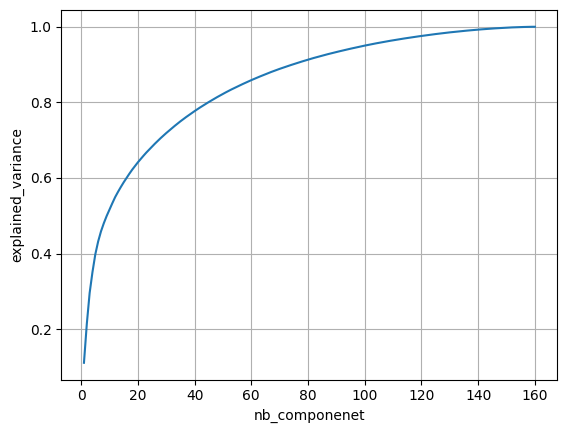

nombre de composantes pour 95% de variance: 100


In [78]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
explained_variance=[]
pca = PCA()
print(X)
images1 = pca.fit_transform(X)
print(images1)
explained_variance.append(pca.explained_variance_ratio_)
print(explained_variance[0].shape)
variance=0
variance_list=list()
for i in range(explained_variance[0].shape[0]):
    variance+=explained_variance[0][i]
    variance_list.append(variance)
print(variance_list)

#faire la somme 
nb=np.arange(1,explained_variance[0].shape[0]+1)
plt.plot(nb,variance_list)
plt.xlabel("nb_componenet")
plt.ylabel("explained_variance")
plt.grid()
plt.show()

i = 0
while i < len(variance_list):
    if variance_list[i] >= 0.95:
        pca_components = i + 1
        break
    i += 1
print(f"nombre de composantes pour 95% de variance: {pca_components}")

In [79]:
pca_ = PCA(n_components=pca_components)
X_reduced = pca_.fit_transform(X)
print(X_reduced.shape)

(160, 100)


In [80]:
import umap
reducer = umap.UMAP(
    n_components=5,        # or 5 for HDBSCAN
    n_neighbors=25,
    min_dist=0.0,
    metric="cosine",
    random_state=42
)

X_umap = reducer.fit_transform(X_reduced)

/mnt/c/Users/MSI/Desktop/My_Work_Space/machine_learning/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Clustering

In [81]:
import hdbscan
print("Running HDBSCAN...")
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom')
labels_hdbscan = clusterer.fit_predict(X_umap)

Running HDBSCAN...


In [84]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools
min_samples = np.arange(1, 100, step=1)
epsilons = np.arange(1, 100, step=1)
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 4):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X_umap)

Index: 0, Score: 0.7094181776046753, Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 2 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2], NumClusters: 3
Index: 1, Score: 0.7094181776046753, Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 2 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2], NumClusters: 3
Index: 2, Score: 0.7094181776046753, Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 2 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 

In [85]:
print(best_dict["best_labels"])
print(best_dict["best_score"])

[ 0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1 -1  1  1  1
  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  0  1  1 -1  1  3  1 -1  1
  1  1  1  1 -1  1  1  1  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2
  2 -1  2 -1  3  2  2 -1  2  2  2  2  2  2  2  2  2  2  2 -1 -1  2 -1  2
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 -1  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3 -1  3  3  3]
0.7335297465324402


In [86]:
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(X_reduced, method='ward')
labels_hierarchy = fcluster(Z, t=4, criterion='maxclust')
print(labels_hierarchy)

from sklearn.metrics import silhouette_score
score = silhouette_score(X_umap, labels_hierarchy)
print(score)


[4 4 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 2 4 2 2 2 2 2 4 2 2 2 4 3 3 3 2 2 3 2 2 3 2 4 4 2 2 3 2 4 2 4 2 2 2
 2 2 3 2 2 2 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4
 4 4 4 4 3 3 4 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 4 1 1 1
 1 1 1 1 1 4 1 1 3 1 1 1]
0.462429940700531


In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
    
n_clusters = 4  # choose based on your data or use methods like the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=300)
labels2 = kmeans.fit_predict(X_umap)
print(labels2)
print(labels.values())
from sklearn.metrics import silhouette_score
score = silhouette_score(X_umap, labels2)
print(score)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 0 0 0 3 0 0 0 0 0 0 0 3 3 3 0 0 3 0 0 3 0 3 3 0 0 3 0 2 0 0 0 0 0
 0 0 3 0 0 0 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 3 1 3 2 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 3 3 1 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 2 2 2]
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
0.6698669791221619


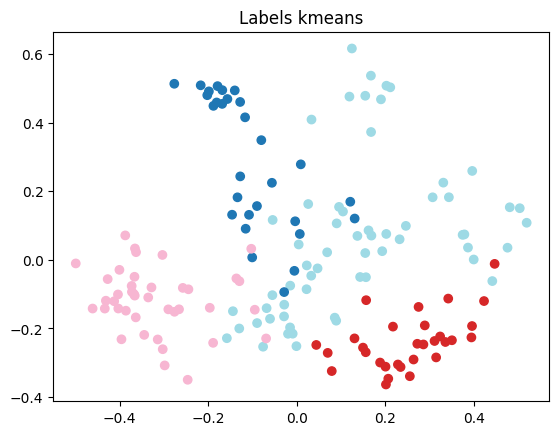

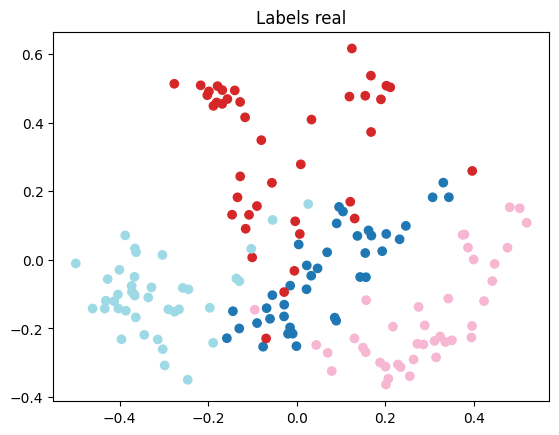

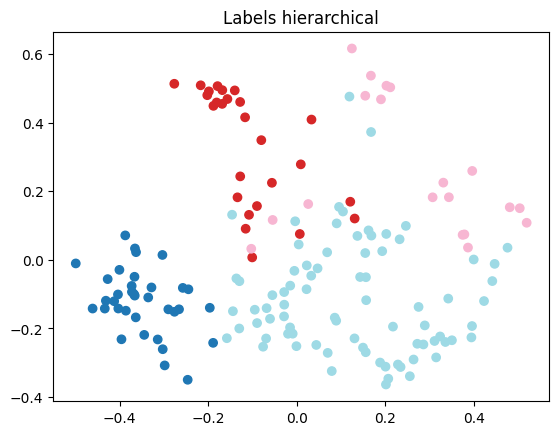

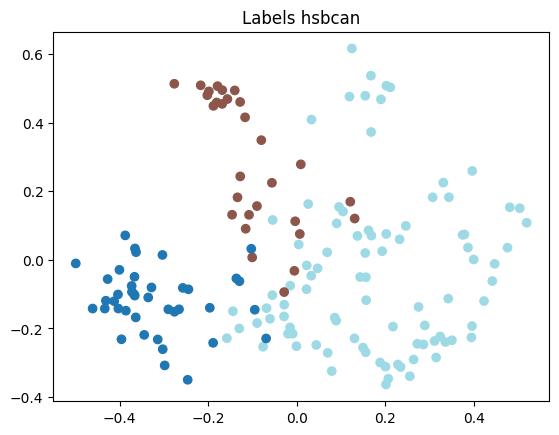

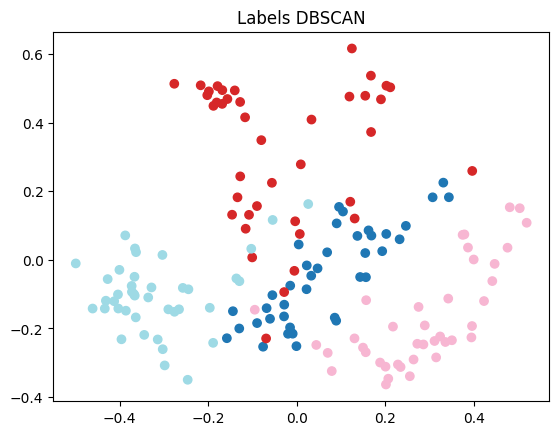

In [89]:
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels2, cmap='tab20')
plt.title("Labels kmeans")
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels.values(), cmap='tab20')
plt.title("Labels real")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_hierarchy, cmap='tab20')
plt.title("Labels hierarchical")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_hdbscan, cmap='tab20')
plt.title("Labels hsbcan")
plt.show()
plt.figure()
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels.values(), cmap='tab20')
plt.title("Labels DBSCAN")
plt.show()